In [4]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr

s1_ticker = 'MSFT'
s2_ticker = 'AAPL'
s3_ticker = 'NVDA'

s1 = fdr.DataReader(s1_ticker, '2018')[['Close']].rename(columns = {'Close':s1_ticker})
s2 = fdr.DataReader(s2_ticker, '2018')[['Close']].rename(columns = {'Close':s2_ticker})
s3 = fdr.DataReader(s3_ticker, '2018')[['Close']].rename(columns = {'Close':s3_ticker})
stocks = pd.concat([s1, s2, s3], axis = 1)
stocks.head()

,MSFT,AAPL,NVDA
Date,,,
2018-01-02,85.949997,43.064999,49.837502
2018-01-03,86.349998,43.057499,53.117500
2018-01-04,87.110001,43.257500,53.397499
2018-01-05,88.190002,43.750000,53.849998
2018-01-08,88.279999,43.587502,55.500000


<Axes: xlabel='Date'>

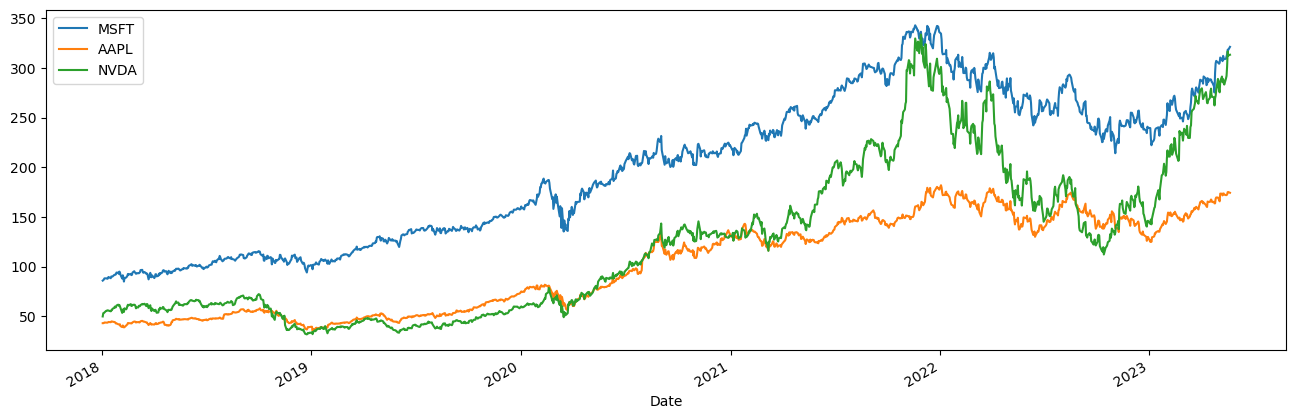

In [5]:
stocks.plot(figsize = (16, 5))

In [6]:
stocks.head()

,MSFT,AAPL,NVDA
Date,,,
2018-01-02,85.949997,43.064999,49.837502
2018-01-03,86.349998,43.057499,53.117500
2018-01-04,87.110001,43.257500,53.397499
2018-01-05,88.190002,43.750000,53.849998
2018-01-08,88.279999,43.587502,55.500000


In [7]:
print('최고점')
print(stocks.idxmax(axis = 0))
print('최고가격')
print(stocks.max(axis = 0))
print('최저점')
print(stocks.idxmin(axis = 0))
print('최저가격')
print(stocks.min(axis = 0))

최고점
MSFT   2021-11-19
AAPL   2022-01-03
NVDA   2021-11-29
dtype: datetime64[ns]
최고가격
MSFT    343.109985
AAPL    182.009995
NVDA    333.760010
dtype: float64
최저점
MSFT   2018-02-08
AAPL   2019-01-03
NVDA   2018-12-24
dtype: datetime64[ns]
최저가격
MSFT    85.010002
AAPL    35.547501
NVDA    31.770000
dtype: float64


In [8]:
melt_stocks = stocks.reset_index().melt(id_vars = ['Date'])
melt_stocks.head()

,Date,variable,value
0,2018-01-02,MSFT,85.949997
1,2018-01-03,MSFT,86.349998
2,2018-01-04,MSFT,87.110001
3,2018-01-05,MSFT,88.190002
4,2018-01-08,MSFT,88.279999


<Axes: xlabel='variable', ylabel='value'>

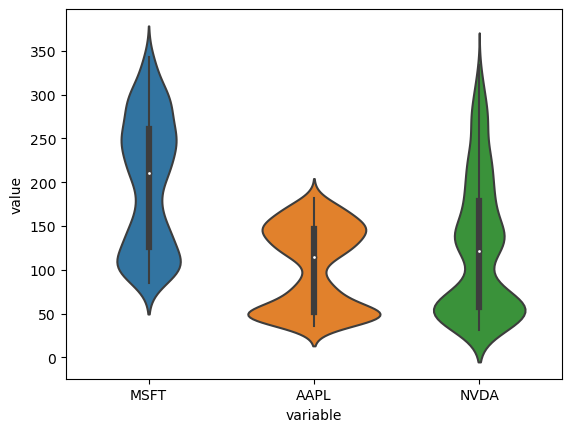

In [9]:
import seaborn as sns
sns.violinplot(data=melt_stocks, x="variable", y="value")

<Axes: ylabel='Frequency'>

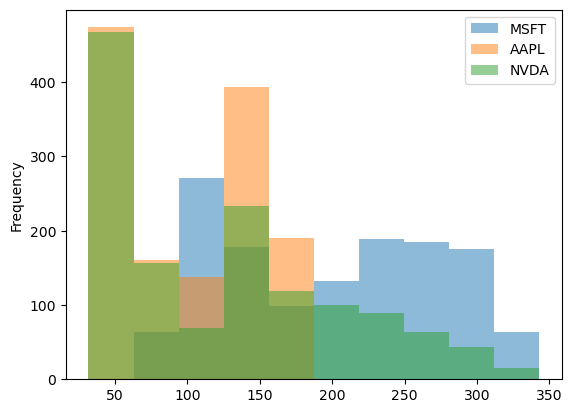

In [10]:
stocks.plot.hist(alpha=0.5)

# 정규화

In [11]:
nomalization = (stocks / stocks.iloc[0]) * 100
nomalization.head()

,MSFT,AAPL,NVDA
Date,,,
2018-01-02,100.000000,100.000000,100.000000
2018-01-03,100.465388,99.982584,106.581385
2018-01-04,101.349627,100.447001,107.143209
2018-01-05,102.606172,101.590621,108.051158
2018-01-08,102.710881,101.213289,111.361922


<Axes: xlabel='Date'>

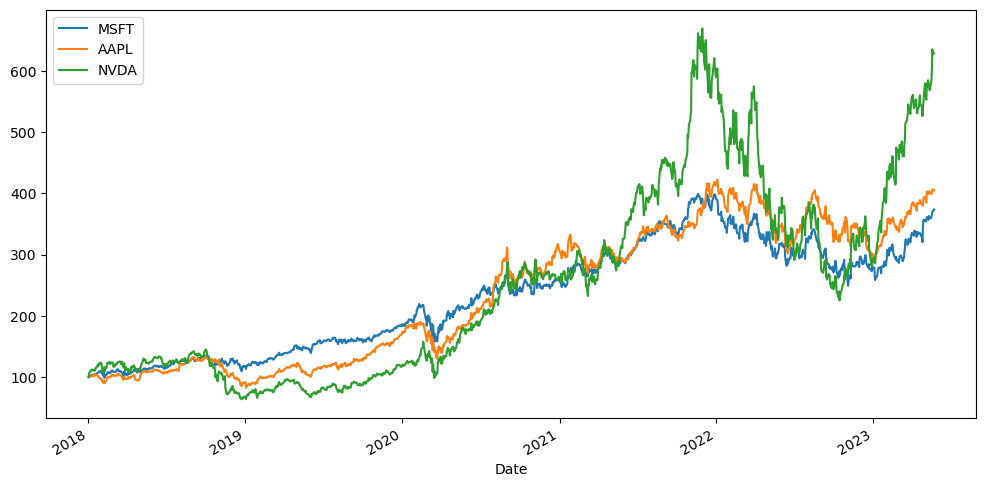

In [12]:
nomalization.plot(figsize = (12, 6))

In [13]:
log_close = np.log(stocks)
log_close.head()

,MSFT,AAPL,NVDA
Date,,,
2018-01-02,4.453766,3.762711,3.908768
2018-01-03,4.458409,3.762536,3.972506
2018-01-04,4.467172,3.767171,3.977764
2018-01-05,4.479494,3.778492,3.986202
2018-01-08,4.480514,3.774770,4.016383


<Axes: xlabel='Date'>

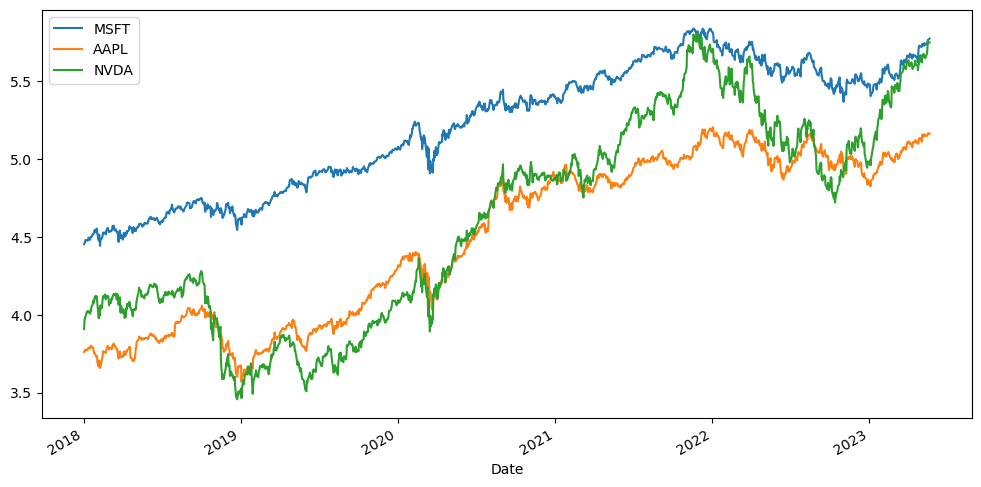

In [14]:
log_close.plot(figsize = (12,6))

In [15]:
# 수익률
returns = stocks.pct_change() * 100
returns.tail()

,MSFT,AAPL,NVDA
Date,,,
2023-05-16,0.736767,0.000000,0.898009
2023-05-17,0.724966,0.360316,3.303322
2023-05-18,1.439487,1.366611,4.970508
2023-05-19,-0.056509,0.062840,-1.306896
2023-05-22,0.958101,-0.422474,0.249488


<Axes: ylabel='Frequency'>

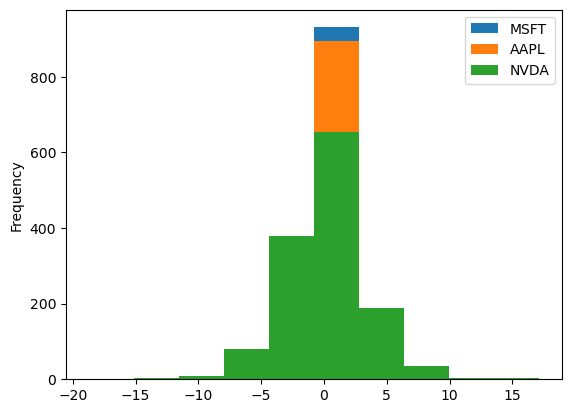

In [16]:
returns.plot.hist()

### 월별수익률

In [17]:
monthly_price = stocks.resample('MS').last()
monthly_price.head()

,MSFT,AAPL,NVDA
Date,,,
2018-01-01,95.010002,41.857498,61.450001
2018-02-01,93.769997,44.529999,60.500000
2018-03-01,91.269997,41.945000,57.897499
2018-04-01,93.519997,41.314999,56.224998
2018-05-01,98.839996,46.717499,63.047501


In [18]:
monthly_return_rate = monthly_price.pct_change() * 100
monthly_return_rate.tail()

,MSFT,AAPL,NVDA
Date,,,
2023-01-01,3.331662,11.052106,33.686873
2023-02-01,0.649691,2.162320,18.830941
2023-03-01,15.588161,11.864860,19.645927
2023-04-01,6.576491,2.898726,-0.100802
2023-05-01,4.598713,2.793497,12.948223


In [ ]:
# 방법1
import plotly.express as px
melt_monthly_stocks = monthly_return_rate.reset_index().melt(id_vars = ['Date'])
fig = px.line(melt_monthly_stocks, x='Date', y="value", color='variable')
fig.show()

In [ ]:
# 방법 2
monthly_price = stocks.resample('QS').last()  # 해당월별 종가
monthly_price.head()
monthly_return_rate = monthly_price.pct_change() * 100
monthly_return_rate.tail()
# 시각화
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(
    x= monthly_return_rate.index,
    y= monthly_return_rate['MSFT'],
    name='MSFT',
    marker_color='indianred'))
fig.add_trace(go.Bar(
    x= monthly_return_rate.index,
    y= monthly_return_rate['AAPL'],
    name='AAPL',
    marker_color='blue'))
fig.add_trace(go.Bar(
    x= monthly_return_rate.index,
    y= monthly_return_rate['NVDA'],
    name='NVDA',
    marker_color='green'))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

<Axes: xlabel='variable', ylabel='value'>

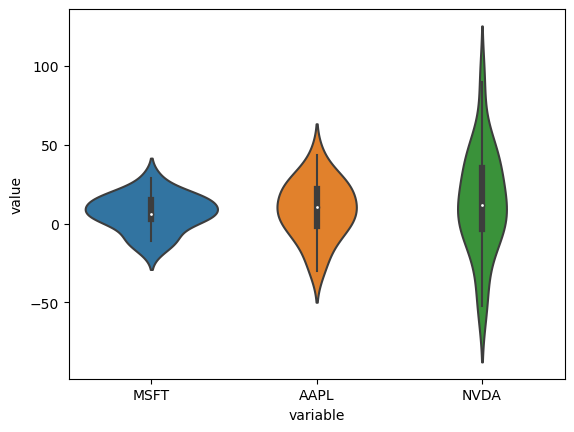

In [21]:
melt_monthly_return_rate = monthly_return_rate.reset_index().melt(id_vars=['Date'])
sns.violinplot(data=melt_monthly_return_rate,x="variable",y='value')

In [22]:
일평균수익률 = returns.mean() # %
일평균수익률

MSFT    0.116355
AAPL    0.124701
NVDA    0.189026
dtype: float64

In [23]:
표준편차 = returns.std()
표준편차

MSFT    1.948394
AAPL    2.069869
NVDA    3.256310
dtype: float64

In [24]:
연평균수익률 = 일평균수익률 * 252
연평균수익률

MSFT    29.321499
AAPL    31.424680
NVDA    47.634550
dtype: float64

In [25]:
연표준편차 = 표준편차 * 252
연표준편차

MSFT    490.995333
AAPL    521.606941
NVDA    820.590090
dtype: float64

In [26]:
return_risk = pd.concat([연평균수익률, 연표준편차], axis = 1)
return_risk.columns = ['Return', 'Risk']
return_risk

,Return,Risk
MSFT,29.321499,490.995333
AAPL,31.424680,521.606941
NVDA,47.634550,820.590090


In [27]:
melt_return_risk = return_risk.reset_index().melt(id_vars = 'index')
melt_return_risk.head()

,index,variable,value
0,MSFT,Return,29.321499
1,AAPL,Return,31.424680
2,NVDA,Return,47.634550
3,MSFT,Risk,490.995333
4,AAPL,Risk,521.606941


In [56]:
import plotly.express as px
fig = px.bar(melt_return_risk, x='index', y='value',
             color='variable', barmode='group',
             height=400)
fig.show()

In [29]:
return_risk

,Return,Risk
MSFT,29.321499,490.995333
AAPL,31.424680,521.606941
NVDA,47.634550,820.590090


In [30]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(return_risk, x=return_risk.Return, y=return_risk.Risk
                 , hover_data=[return_risk.index])
fig.show()

In [31]:
return_rate = returns/100

In [32]:
cum_returns = (return_rate + 1).cumprod() - 1
cum_returns.tail()

,MSFT,AAPL,NVDA
Date,,,
2023-05-16,2.626992,2.995588,4.861650
2023-05-17,2.653287,3.009985,5.055279
2023-05-18,2.705876,3.064786,5.356258
2023-05-19,2.703781,3.067340,5.273188
2023-05-22,2.739267,3.050157,5.288839


<Axes: xlabel='Date'>

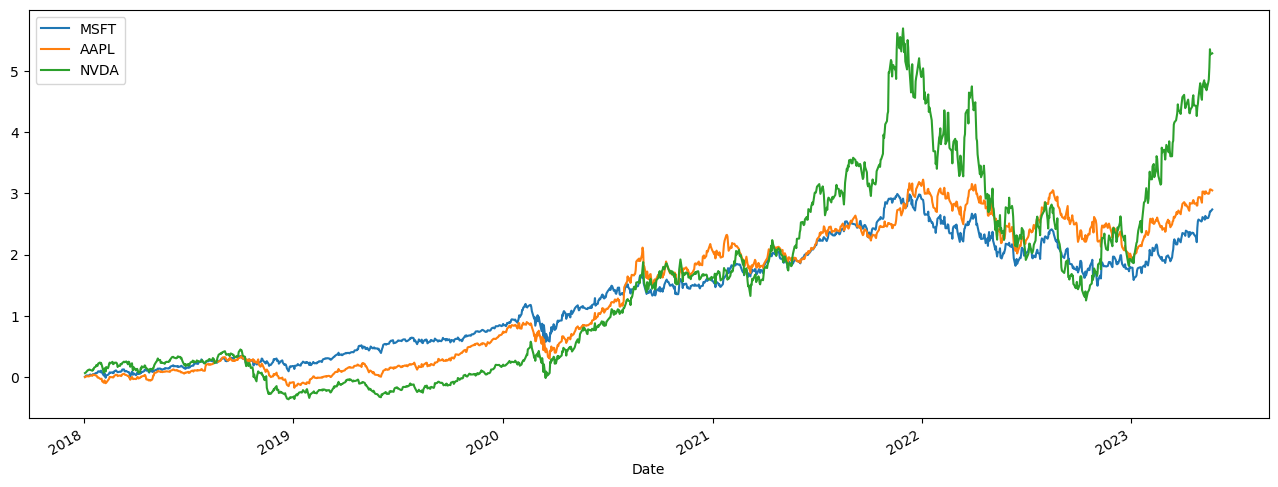

In [33]:
cum_returns.plot(figsize = (16,6))

In [34]:
# 공분산
return_rate.cov()

,MSFT,AAPL,NVDA
MSFT,0.000380,0.000306,0.000449
AAPL,0.000306,0.000428,0.000442
NVDA,0.000449,0.000442,0.001060


In [35]:
# 상관계수
return_rate.corr().style.background_gradient(cmap='coolwarm') # Blues

,MSFT,AAPL,NVDA
MSFT,1.000000,0.759984,0.708443
AAPL,0.759984,1.000000,0.656011
NVDA,0.708443,0.656011,1.000000


<Axes: xlabel='MSFT', ylabel='AAPL'>

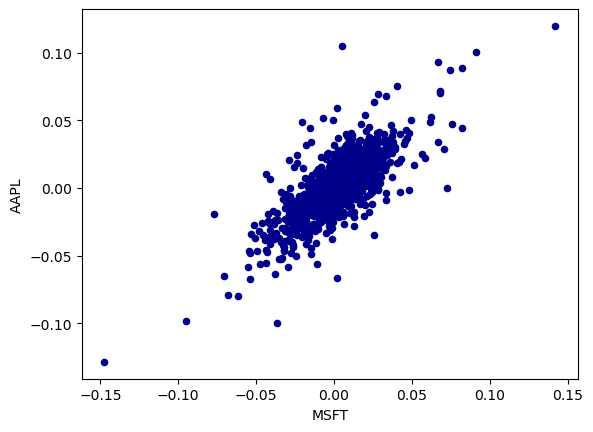

In [36]:
# return_rate

return_rate.plot.scatter(x='MSFT',
                       y='AAPL',
                       c='DarkBlue')

<Axes: xlabel='MSFT', ylabel='AAPL'>

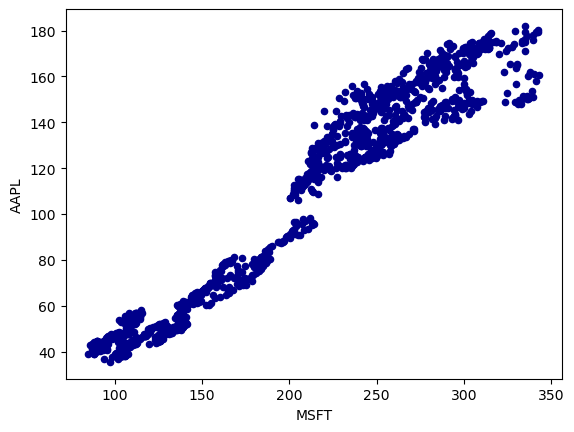

In [37]:
stocks.plot.scatter(x='MSFT',
                       y='AAPL',
                       c='DarkBlue')

array([[<Axes: xlabel='MSFT', ylabel='MSFT'>,
        <Axes: xlabel='AAPL', ylabel='MSFT'>,
        <Axes: xlabel='NVDA', ylabel='MSFT'>],
       [<Axes: xlabel='MSFT', ylabel='AAPL'>,
        <Axes: xlabel='AAPL', ylabel='AAPL'>,
        <Axes: xlabel='NVDA', ylabel='AAPL'>],
       [<Axes: xlabel='MSFT', ylabel='NVDA'>,
        <Axes: xlabel='AAPL', ylabel='NVDA'>,
        <Axes: xlabel='NVDA', ylabel='NVDA'>]], dtype=object)

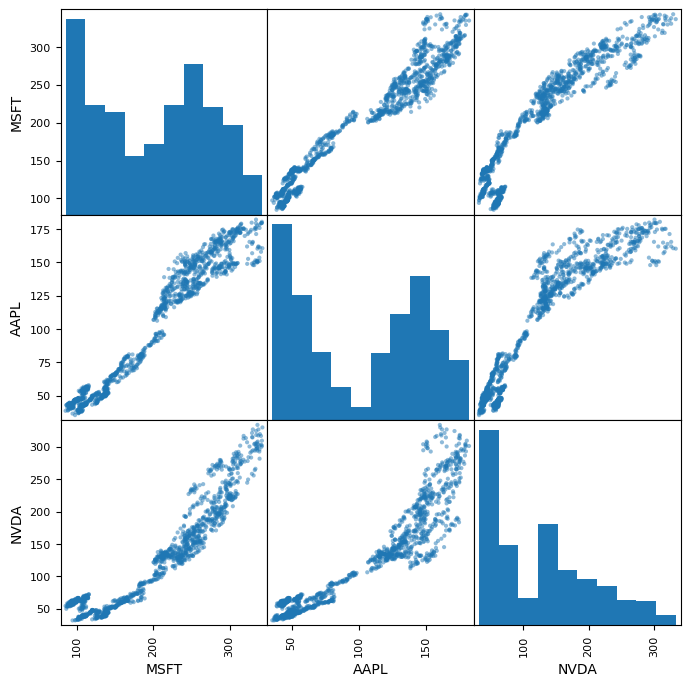

In [38]:
from pandas.plotting import scatter_matrix
scatter_matrix(stocks, figsize = (8,8))

In [39]:
# 이동평균
stocks.rolling(5).mean().dropna()

,MSFT,AAPL,NVDA
Date,,,
2018-01-08,87.175999,43.343500,53.140500
2018-01-09,87.630000,43.447000,54.270000
2018-01-10,87.924001,43.550000,54.830499
2018-01-11,88.118001,43.662500,55.354999
2018-01-12,88.400000,43.767000,55.734000
...,...,...,...
2023-05-16,310.517993,172.804004,287.938001
2023-05-17,310.855993,172.630005,290.523999
2023-05-18,312.537994,172.890005,296.723999


In [40]:
# 지수가중이동평균균
stocks.ewm(span = 10).mean()

,MSFT,AAPL,NVDA
Date,,,
2018-01-02,85.949997,43.064999,49.837502
2018-01-03,86.169998,43.060874,51.641501
2018-01-04,86.547873,43.139916,52.347400
2018-01-05,87.088881,43.340912,52.842439
2018-01-08,87.430819,43.411701,53.605353
...,...,...,...
2023-05-16,307.962889,171.504858,285.898775
2023-05-17,309.060545,171.720338,288.786271
2023-05-18,310.780444,172.325732,293.876039


In [41]:
SMA = stocks.rolling(100).mean().dropna()
EWMA = stocks.ewm(100).mean().dropna()

<Axes: xlabel='Date'>

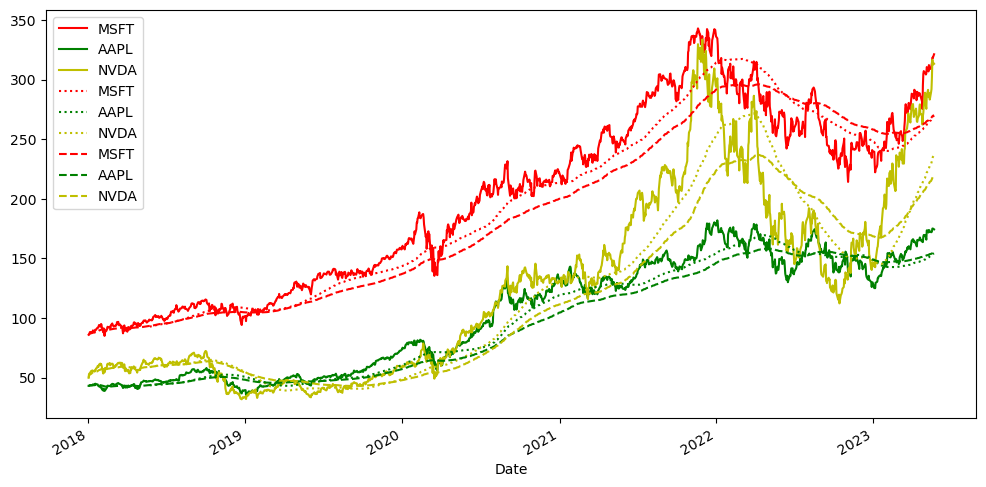

In [42]:
ax = stocks.plot(figsize = (12,6), style = {'MSFT': 'r', 'AAPL' : 'g', 'NVDA':'y'})
SMA.plot(figsize = (12,6), ax = ax,style = {'MSFT': ':r', 'AAPL' : ':g', 'NVDA':':y'})
EWMA.plot(figsize = (12,6), ax = ax,style = {'MSFT': '--r', 'AAPL' : '--g', 'NVDA':'--y'})

In [43]:
KOSPI = fdr.DataReader('KS11', '2016')[['Close']].rename(columns = {'Close':'KOSPI'})
NASDAQ = fdr.DataReader('IXIC', '2016')[['Close']].rename(columns = {'Close':'NASDAQ'})
SnP500 = fdr.DataReader('US500', '2016')[['Close']].rename(columns = {'Close':'SnP500'})
GOLD = fdr.DataReader('ZG', '2016')[['Close']].rename(columns = {'Close':'Gold'}) # 금선물
BTC = fdr.DataReader('BTC/KRW', '2016')[['Close']].rename(columns = {'Close':'BTC/KRW'}) # 비트코인

In [54]:
KOSPI.tail()

,KOSPI
Date,
2023-05-16,2480.239990
2023-05-17,2494.659912
2023-05-18,2515.399902
2023-05-19,2537.790039
2023-05-22,2557.080078


In [53]:
NASDAQ.tail()

,NASDAQ
Date,
2023-05-16,12343.049805
2023-05-17,12500.570313
2023-05-18,12688.839844
2023-05-19,12657.900391
2023-05-22,12718.824219


In [52]:
SnP500.tail()

,SnP500
Date,
2023-05-16,4109.899902
2023-05-17,4158.770020
2023-05-18,4198.049805
2023-05-19,4191.979980
2023-05-22,4197.520020


In [51]:
GOLD.tail()

,Gold
Date,
2023-05-16,44.180000
2023-05-17,44.810001
2023-05-18,45.070000
2023-05-19,44.520000
2023-05-22,44.915001


In [55]:
BTC.tail()

,BTC/KRW
Date,
2023-05-18,36574660.0
2023-05-19,35823416.0
2023-05-20,35634940.0
2023-05-21,35952264.0
2023-05-22,35340660.0
